In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv("../data/health_lifestyle_dataset.csv")

In [16]:
df.head(10)

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
5,6,25,Male,27.3,19495,5.0,4.4,1301,0,1,73,107,65,284,0,0
6,7,78,Female,37.1,16739,9.5,4.2,3478,1,0,90,110,102,201,0,0
7,8,38,Female,18.9,1726,4.8,1.7,3212,0,1,64,113,109,197,0,0
8,9,56,Female,18.2,1764,5.1,1.5,3740,0,1,91,112,61,237,1,0
9,10,75,Male,23.5,9730,4.5,0.7,3571,0,1,54,177,90,157,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [18]:
df.describe()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


In [19]:
df.isnull() .sum()

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

In [20]:
df.duplicated() .sum()

np.int64(0)

In [21]:
# Drop columns that are not useful for prediction
df_clean = df.drop(columns=['id'])

# Encode gender (Male=0, Female=1)
df_clean['gender'] = df_clean['gender'].map({'Male': 0, 'Female': 1})

# Check again
df_clean.head()


,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,56,0,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,69,1,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,46,0,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,32,1,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,60,1,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [22]:
df.columns

Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')

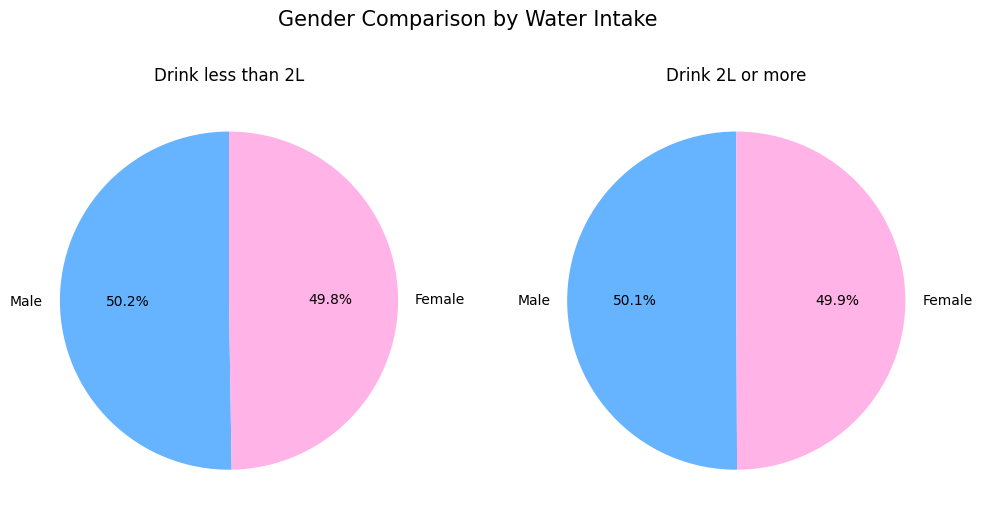

In [23]:
# Split data
low_water = df[df['water_intake_l'] < 2]
high_water = df[df['water_intake_l'] >= 2]

# Calculate gender counts for each group
low_gender = low_water['gender'].value_counts()
high_gender = high_water['gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie for < 2L
axes[0].pie(
    low_gender,
    labels=low_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ffb3e6']
)
axes[0].set_title('Drink less than 2L')

# Pie for ≥ 2L
axes[1].pie(
    high_gender,
    labels=high_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ffb3e6']
)
axes[1].set_title('Drink 2L or more')

plt.suptitle('Gender Comparison by Water Intake', fontsize=15)
plt.show()


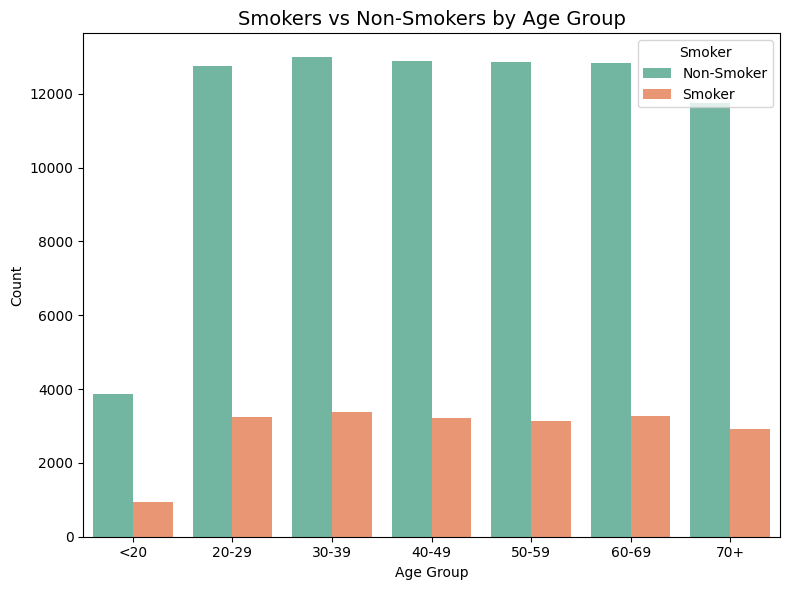

In [24]:
# Create age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 20, 30, 40, 50, 60, 70, 80],
    labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
)

# Plot 1: Smokers vs Non-Smokers by Age Group
plt.figure(figsize=(8,6))
sns.countplot(
    x='age_group',
    hue='smoker',
    data=df,
    palette='Set2'
)
plt.title('Smokers vs Non-Smokers by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.tight_layout()
plt.show()

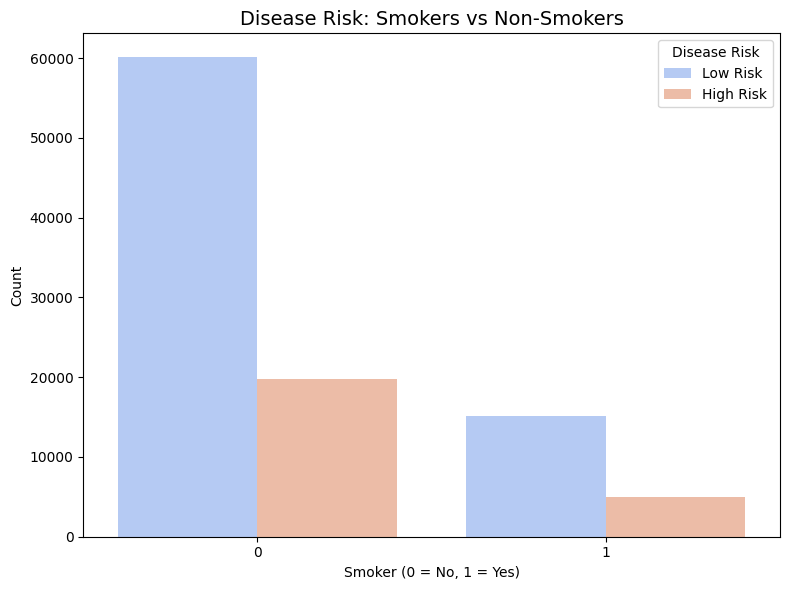

In [25]:
# Plot 2: Disease Risk by Smoking Status
plt.figure(figsize=(8,6))
sns.countplot(
    x='smoker',
    hue='disease_risk',
    data=df,
    palette='coolwarm'
)
plt.title('Disease Risk: Smokers vs Non-Smokers', fontsize=14)
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Disease Risk', labels=['Low Risk', 'High Risk'])
plt.tight_layout()
plt.show()

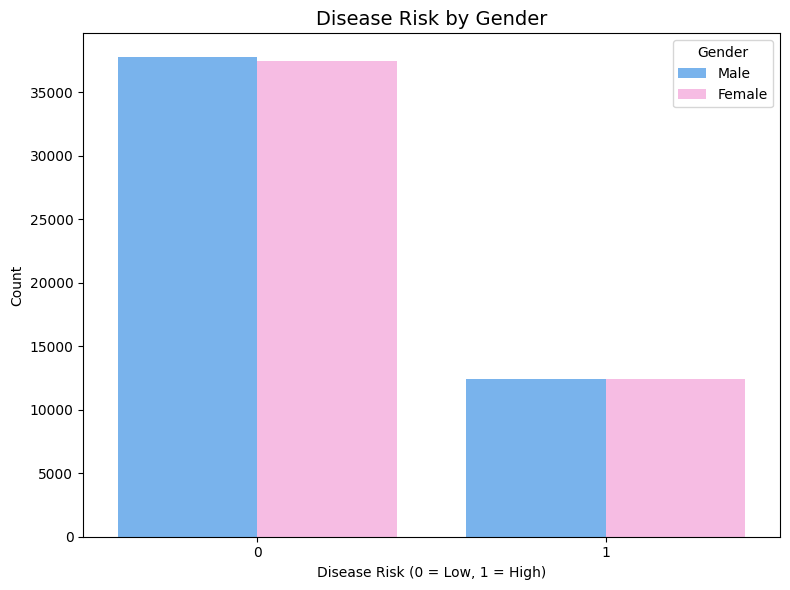

In [26]:
# Define custom colors for genders (same as you requested)
custom_palette = {
    'Male': '#66b3ff',   # blue
    'Female': '#ffb3e6'  # pink
}

plt.figure(figsize=(8,6))
sns.countplot(x='disease_risk', hue='gender', data=df, palette=custom_palette)
plt.title("Disease Risk by Gender", fontsize=14)
plt.xlabel("Disease Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
# Disease risk in this dataset was likely calculated based on:
# 1. Body Mass Index (BMI)
# 2. Blood Pressure (Systolic_BP / Diastolic_BP)
# 3. Cholesterol levels
# 4. Family medical history (family_history)
# 5. Lifestyle habits (smoking, walking activity, water intake)


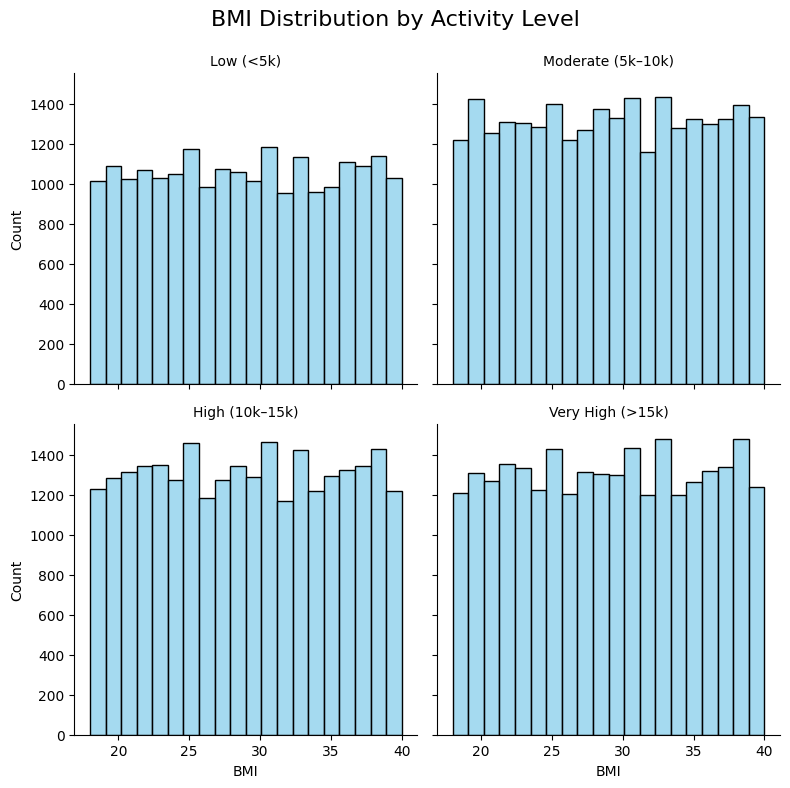

In [27]:
# إعادة تعريف الفئات (لو غير موجودة)
df['activity_level'] = pd.cut(
    df['daily_steps'],
    bins=[0, 5000, 10000, 15000, 20000],
    labels=['Low (<5k)', 'Moderate (5k–10k)', 'High (10k–15k)', 'Very High (>15k)']
)

# رسم منفصل لكل فئة مشي
g = sns.FacetGrid(df, col="activity_level", col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "bmi", bins=20, color="skyblue", edgecolor="black")
g.set_titles("{col_name}")
g.set_axis_labels("BMI", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("BMI Distribution by Activity Level", fontsize=16)
plt.show()


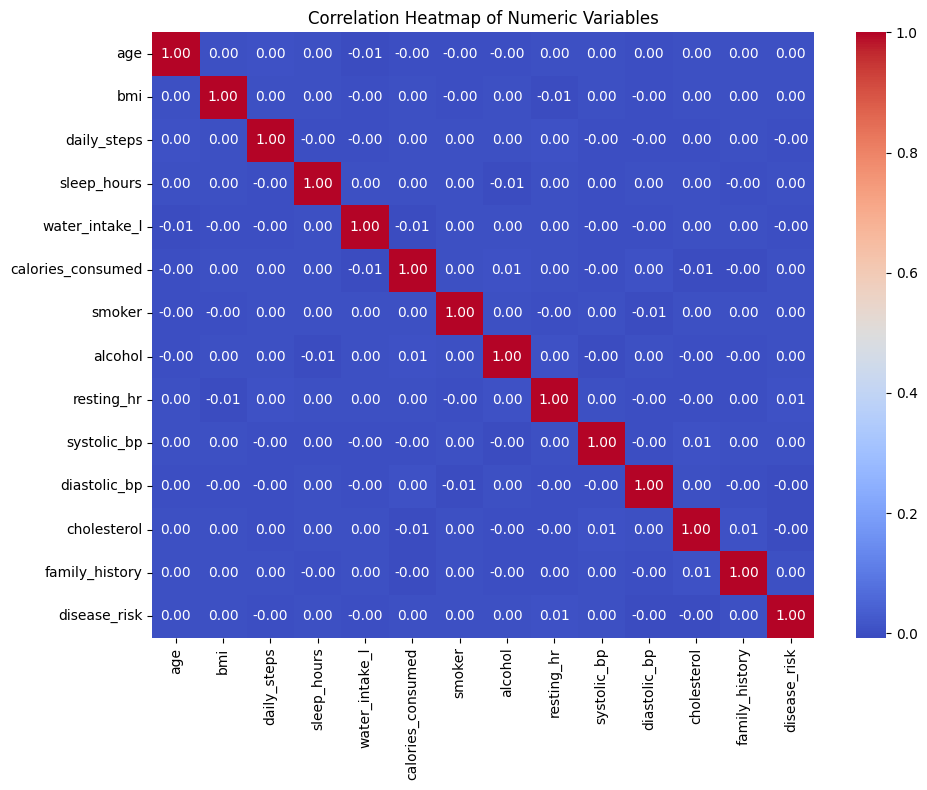

In [28]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation Heatmap - only if there are 4 or more numeric columns
if len(numeric_cols) >= 4:
    numeric_df = df.select_dtypes(include=[np.number])

    # Remove 'id' column if it exists
    if 'id' in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=['id'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()


In [29]:
# Define features (X) and target (y)
X = df_clean.drop(columns=['disease_risk'])
y = df_clean['disease_risk']

# Split the data (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/home/moath/.pyenv/versions/Lifestyle_Nexus/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7521

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     15042
           1       0.00      0.00      0.00      4958

    accuracy                           0.75     20000
   macro avg       0.38      0.50      0.43     20000
weighted avg       0.57      0.75      0.65     20000



/home/moath/.pyenv/versions/Lifestyle_Nexus/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/moath/.pyenv/versions/Lifestyle_Nexus/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/moath/.pyenv/versions/Lifestyle_Nexus/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [31]:
#Separate the classes
df_majority = df_clean[df_clean['disease_risk'] == 0]
df_minority = df_clean[df_clean['disease_risk'] == 1]

#Upsample the minority class to balance the data
df_minority_upsampled = resample(
    df_minority,
    replace=True,     # sample with replacement
    n_samples=len(df_majority),  # match majority size
    random_state=42
)

# Combine back
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("Balanced dataset shape:")
print(df_balanced['disease_risk'].value_counts())

# Split features and target
X = df_balanced.drop(columns=['disease_risk'])
y = df_balanced['disease_risk']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split and retrain model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate again
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Balanced dataset shape:
disease_risk
0    75179
1    75179
Name: count, dtype: int64
Accuracy: 0.49837057728119183

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     15011
           1       0.50      0.48      0.49     15061

    accuracy                           0.50     30072
   macro avg       0.50      0.50      0.50     30072
weighted avg       0.50      0.50      0.50     30072

